In [5]:
from rdflib import Graph, Namespace, BNode

# Load the RDF graph from a Turtle file
g = Graph()
g.parse("co-learning-OWL-ontology.ttl", format="turtle")
g.parse("./data/p03.ttl", format="turtle")


# write a query to get all the triples:
query = """
SELECT ?s ?p ?o WHERE {
    ?s ?p ?o .
    }
"""

for row in g.query(query):
    print(f"Subject: {row.s}, Predicate: {row.p}, Object: {row.o}")

# # Print out the triples
# for subj, pred, obj in g:
#     print(subj, pred, obj)

BadSyntax: at line 95 of <>:
Bad syntax (objectList expected) at ^ in:
"...b'olearn:p03 ;\n# Define a situation.\ncolearn:situation_p03_s03'^b' a colearn:Situation ;\n    rdfs:label "Participant p03, Situ'..."

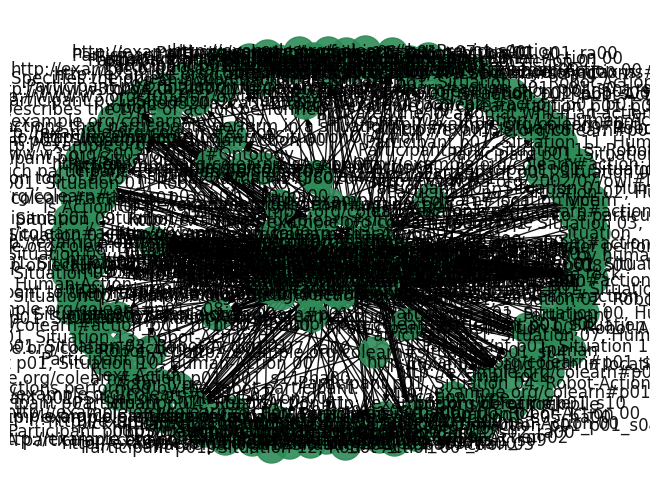

In [2]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

# Load your RDFLib graph
# g = rdflib.Graph()
# Populate your graph (assuming this is already done)

# Convert RDFLib graph to a networkx graph
nx_graph = rdflib_to_networkx_multidigraph(g)

# Draw the graph
pos = nx.spring_layout(nx_graph, scale=2)
nx.draw(nx_graph, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='seagreen', alpha=0.9,
        labels={node: node for node in nx_graph.nodes()})
plt.show()

In [12]:
# Export to Turtle format
g.serialize(destination='output.ttl', format='turtle')

<Graph identifier=N98a243e927104a08bd950df63c41f4fc (<class 'rdflib.graph.Graph'>)>